

# App or Website, where should we put efforts to engage users

This is a data science project related to customer behavior. 

An ecommerce company that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 

This project focuses on applying linear regression model to compare and interpret the importance of app and website on
impacting users' engagement

Project Source: Python for Data Science and Machine Learning Bootcamp
https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/

## Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Get the Data

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 
* Yearly Amount Spent: Average dollar amount that the user spent in the store each year. (User engagement)

In [2]:
customers=pd.read_csv('Ecommerce Customers')

**Explore the basic information of the dataset**

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Exploratory Data Analysis

**Since most related features are numeric values, the EDA mainly focuses on 3 parts**


**1. Pariplot to show the relationship between two features**

**2. Correlation plot to show the relationship in a quantitative way**

**3. Linear plots to show the relationship between users' amount spent and Time on App/Time on Website/Length of Membership**

## Pair Plot

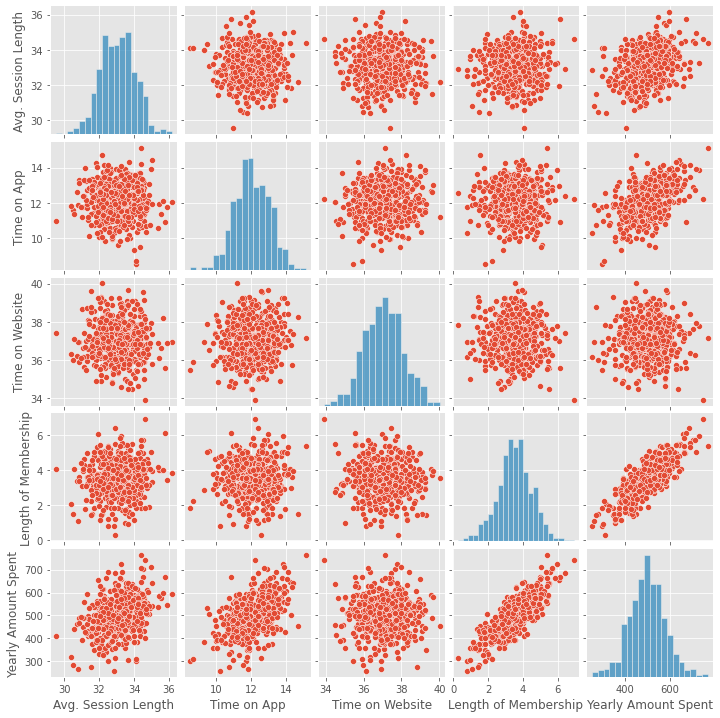

In [7]:
g=sns.pairplot(customers,palette='coolwarm')
g.fig.set_size_inches(10,10)

**From the plots we can see the relationship between length of membership and Yearly Amount Spent is linear, from which we can assume there is a positive linear relationship between those two variables**

## Correlation Heatmap

<AxesSubplot:>

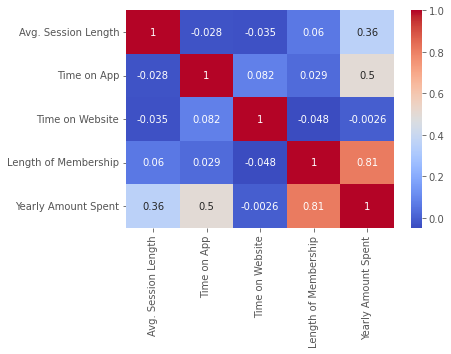

In [8]:
sns.heatmap(customers.corr(),cmap='coolwarm',annot=True)

**From the plot we can see Yearly Amount Spent and Length of Membership are most correlated (r=0.81).**

**Time on App is more correlated with Yearly Amount Spent (r=0.5) than Time on Website (-0.0026), from which we can assume Time on App impacting user engagement more than Time on Website.**

## Compare the impact of Time on App and Time on Website on users' amount spent

**Use linear plot and hex bin plot to conduct analysis.**

### Relationship between Time on Website and Yearly Amount Spent

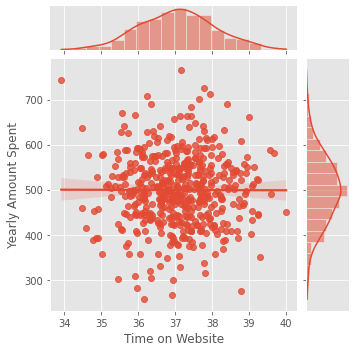

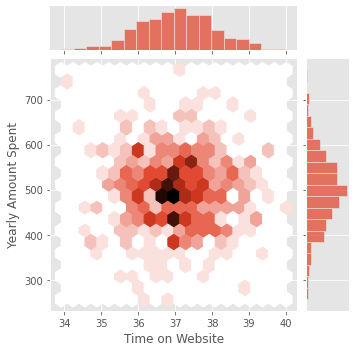

In [9]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers,kind='reg',height=5)
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers,kind='hex',height=5)

### Relationship between Time on App and Yearly Amount Spent

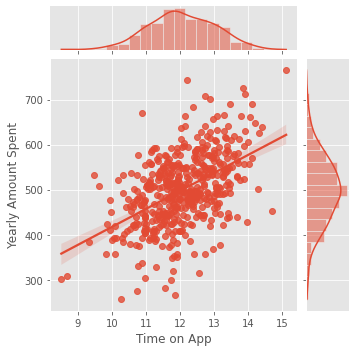

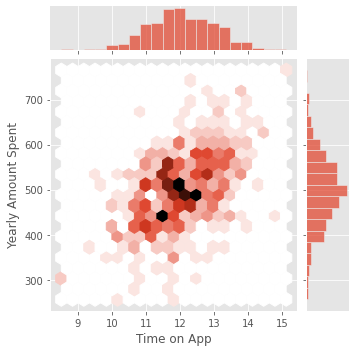

In [10]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers,kind='reg',height=5)
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers,kind='hex',height=5)

# Model Building


**Training and Testing Data**


In [11]:
X=customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=customers['Yearly Amount Spent']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

## Linear Regression

In [13]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.287716
Time on App,39.171783
Time on Website,0.321668
Length of Membership,61.248401


In [15]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/Users/jingyiran/opt/anaconda3/envs/yiyi/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/jingyiran/opt/anaconda3/envs/yiyi/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/jingyiran/opt/anaconda3/envs/yiyi/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7766.
Date:                 Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                         15:17:27   Log-Likelihood:                -1856.9
No. Observations:                  500   AIC:                             3724.
Df Residuals:                      495   BIC:                             3745.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

## Model Explanation

The p value of Time on Website is larger than 0,05, so this variable is not statistically significant.
Other variables are statistically significant

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of \$25.73** in Yearly Amount Spent.
- Holding all other features fixed, a 1 Minute increase in **Time on App** is associated with an **increase of \$38.71** in Yearly Amount Spent.
- Holding all other features fixed, a 1 year increase in **Length of Membership** is associated with an **increase of \$61.58** in Yearly Amount Spent.
- **Time on Website** is **not siginficantly** related to Yearly Amount Spent.

# Model Evaluation

In [16]:
y_predict=lr.predict(X_test)

Text(0.5, 1.0, 'Predicted Value VS True Value')

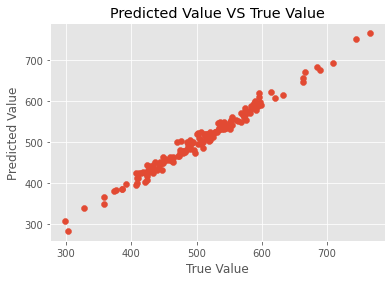

In [18]:
plt.scatter(y_test,y_predict)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Predicted Value VS True Value')

/Users/jingyiran/opt/anaconda3/envs/yiyi/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

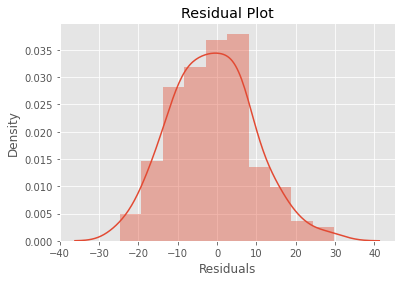

In [19]:
r=sns.distplot(y_predict-y_test,bins=10)
r.set(title='Residual Plot')
r.set_xlabel('Residuals')

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 8.414860085645266
MSE: 109.27910351983392
RMSE: 10.45366459763436
